In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import sys
import requests
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
low_memory=False
from scipy.stats import linregress
import matplotlib.ticker as mtick
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = 'Resources/GenreMovies.csv'
genre_movie_df = pd.read_csv(csv_file)

In [3]:
# Get indexes for which column budget has value 0
zero_values = genre_movie_df[genre_movie_df['budget'] == 0 ].index 
# Delete these row indexes from dataFrame
genre_movie_df.drop(zero_values , inplace=True)
len(zero_values)

1551

In [4]:
genre_movie_grouping_df = genre_movie_df.loc[:,['genre','budget','revenue']].groupby('genre').mean().astype(int)

In [5]:
genre_movie_grouping_df

,budget,revenue
genre,,
Action,60236494,189509131
Adventure,100604023,315423461
Animation,65148923,263967040
Comedy,22593698,68792963
Crime,25652095,62687966
Documentary,3967064,8832964
Drama,18900967,55950204
Family,57916505,224206121
Fantasy,60983520,193280503


In [6]:
# Add profit and profit margin columns
genre_movie_grouping_df['profit'] = genre_movie_grouping_df['revenue'] - genre_movie_grouping_df['budget']
genre_movie_grouping_df['profit margin'] = round((genre_movie_grouping_df['profit'] / genre_movie_grouping_df['revenue'])
                                           *100,1)
genre_movie_grouping_df = genre_movie_grouping_df.drop(['TV Movie'])
genre_movie_grouping_df = genre_movie_grouping_df.sort_values('profit margin')
genre_movie_grouping_df

,budget,revenue,profit,profit margin
genre,,,,
Documentary,3967064,8832964,4865900,55.1
Music,18187892,40718011,22530119,55.3
Thriller,23446719,56290631,32843912,58.3
Crime,25652095,62687966,37035871,59.1
War,45912287,121641813,75729526,62.3
Romance,20920201,57347402,36427201,63.5
Drama,18900967,55950204,37049237,66.2
Western,44250000,134960177,90710177,67.2
Comedy,22593698,68792963,46199265,67.2


In [102]:
# Creates Profit and Profit Margin columns
genre_movie_df['profit'] = genre_movie_df['revenue'] - genre_movie_df['budget']
genre_movie_df['profit margin'] = round((genre_movie_df['profit'] / genre_movie_df['revenue'])*100,1)

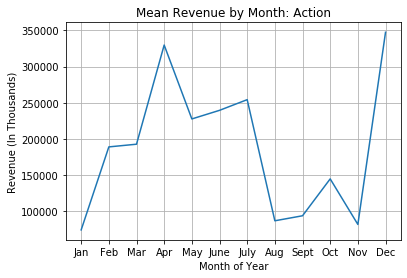

In [52]:
# Shows Action genre mean revenue by month 
action_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Action']
action_genre_releaseDate_df = action_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
action_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(action_genre_releaseDate_df['release_date']).month
action_genre_releaseDate_monthGroup_df = action_genre_releaseDate_df.groupby('release_month').mean()
revenue_action_genre_releaseDate_monthGroup_df = action_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_action_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_action_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.xticks(revenue_action_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.plot(revenue_action_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.title("Mean Revenue by Month: Action")
plt.ylabel("Revenue (In Thousands)")
plt.xlabel("Month of Year")
plt.grid()
plt.show()

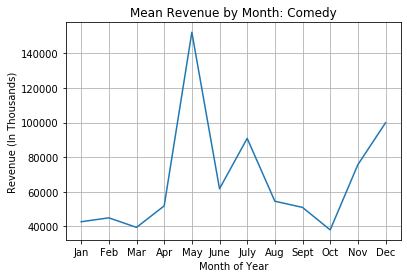

In [51]:
# Shows Comedy genre mean revenue by month 
comedy_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Comedy']
comedy_genre_releaseDate_df = comedy_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
comedy_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(comedy_genre_releaseDate_df['release_date']).month
comedy_genre_releaseDate_monthGroup_df = comedy_genre_releaseDate_df.groupby('release_month').mean()
revenue_comedy_genre_releaseDate_monthGroup_df = comedy_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_comedy_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_comedy_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_comedy_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_comedy_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title("Mean Revenue by Month: Comedy")
plt.ylabel("Revenue (In Thousands)")
plt.xlabel("Month of Year")
plt.grid()
plt.show()

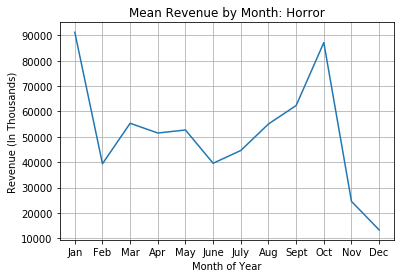

In [50]:
# Shows Horror genre mean revenue by month 
horror_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Horror']
horror_genre_releaseDate_df = horror_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
horror_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(horror_genre_releaseDate_df['release_date']).month
horror_genre_releaseDate_monthGroup_df = horror_genre_releaseDate_df.groupby('release_month').mean()
revenue_horror_genre_releaseDate_monthGroup_df = horror_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_horror_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_horror_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title("Mean Revenue by Month: Horror")
plt.ylabel("Revenue (In Thousands)")
plt.xlabel("Month of Year")
plt.grid()
plt.show()

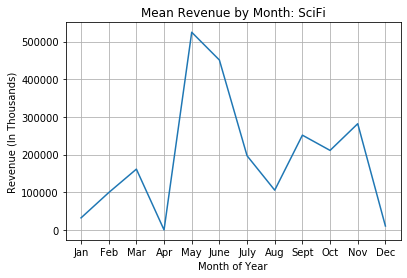

In [49]:
# Shows SciFi genre mean revenue by month 
SciFi_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Science Fiction']
SciFi_genre_releaseDate_df = SciFi_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
SciFi_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(SciFi_genre_releaseDate_df['release_date']).month
SciFi_genre_releaseDate_monthGroup_df = SciFi_genre_releaseDate_df.groupby('release_month').mean()
revenue_SciFi_genre_releaseDate_monthGroup_df = SciFi_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_SciFi_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_SciFi_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_SciFi_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_SciFi_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title("Mean Revenue by Month: SciFi")
plt.ylabel("Revenue (In Thousands)")
plt.xlabel("Month of Year")
plt.grid()
plt.show()

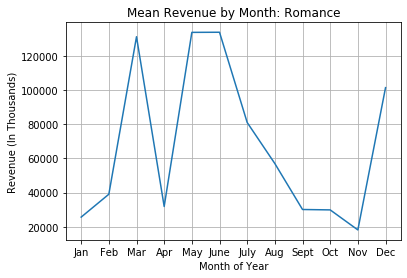

In [48]:
# Shows Romance genre mean revenue by month 
romance_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Romance']
romance_genre_releaseDate_df = romance_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
romance_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(romance_genre_releaseDate_df['release_date']).month
romance_genre_releaseDate_monthGroup_df = romance_genre_releaseDate_df.groupby('release_month').mean()
revenue_romance_genre_releaseDate_monthGroup_df = romance_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_romance_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_romance_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_romance_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_romance_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title("Mean Revenue by Month: Romance")
plt.ylabel("Revenue (In Thousands)")
plt.xlabel("Month of Year")
plt.grid()
plt.show()

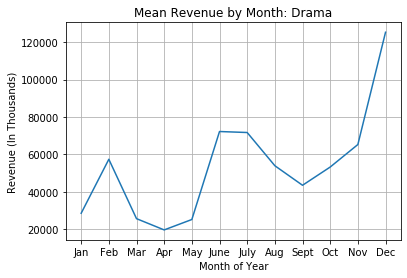

In [47]:
# Shows Drama genre mean revenue by month 
drama_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Drama']
drama_genre_releaseDate_df = drama_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
drama_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(drama_genre_releaseDate_df['release_date']).month
drama_genre_releaseDate_monthGroup_df = drama_genre_releaseDate_df.groupby('release_month').mean()
revenue_drama_genre_releaseDate_monthGroup_df = drama_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_drama_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_drama_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_drama_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_drama_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title("Mean Revenue by Month: Drama")
plt.ylabel("Revenue (In Thousands)")
plt.xlabel("Month of Year")
plt.grid()
plt.show()

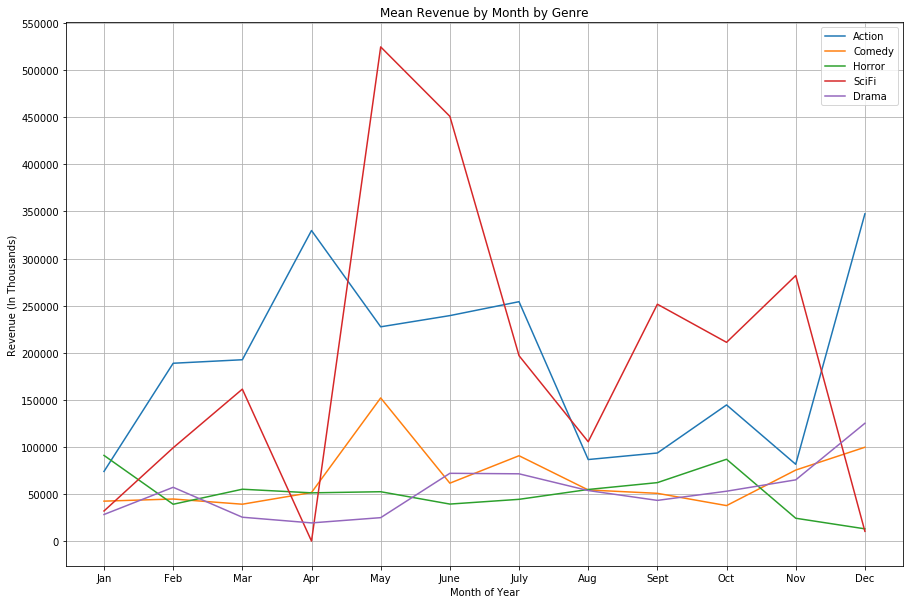

In [32]:
# Shows several genres mean revenue by month 
plt.figure(figsize=(15,10))
plt.plot(revenue_action_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_comedy_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_SciFi_genre_releaseDate_monthGroup_df['revenue_thousands'])
# plt.plot(revenue_romance_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_drama_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_drama_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
y_axis_ticks = np.arange(0,600000,50000)
plt.yticks(y_axis_ticks)
plt.legend(['Action', 'Comedy', 'Horror','SciFi','Drama'], loc='upper right')
plt.grid()
plt.title("Mean Revenue by Month by Genre")
plt.ylabel("Revenue (In Thousands)")
plt.xlabel("Month of Year")
plt.show()

In [73]:
# Group main df into month and genre
genreMonth_df = genre_movie_df.loc[:,['title','release_date','revenue','profit','profit margin','genre']]
# USe DatetimeIndex .month function to convert release date to month number
genreMonth_df['release_month'] = pd.DatetimeIndex(genreMonth_df['release_date']).month
genreMonth_df['revenue_thousands'] = round(genreMonth_df['revenue'] / 1000,2)
genreMonth_df = genreMonth_df.drop(columns=['release_date','revenue','profit','profit margin'])
genreMonth_df.head()
genreMonth_grouped_df = genreMonth_df.groupby(['release_month','genre']).mean().round(2)
genreMonth_grouped_df.head(12)

revenue_thousands
release_month genre                         
1             Action                74205.63
              Adventure             77198.90
              Animation            320028.42
              Comedy                42694.38
              Crime                 38999.80
              Documentary            9331.65
              Drama                 28520.86
              Family                53431.16
              Fantasy              177054.43
              History               12000.00
              Horror                91213.60
              Mystery              131418.09

In [92]:
months = ['', 'Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
max_month = {}

for i in range(len(genreMonth_grouped_df)):
    month_index = genreMonth_grouped_df.index[i][0]
    
    # Create a new index in the dict (e.g. {"Jan": 0.0})
    if months[month_index] not in max_month.keys():
        max_month[months[month_index]] = ['NA', 0.0]
    
    # 
    month_name = months[month_index]
    if max_month[month_name][1] < genreMonth_grouped_df.iloc[i][0]:
        max_month[month_name][0] = genreMonth_grouped_df.index[i][1]
        max_month[month_name][1] = genreMonth_grouped_df.iloc[i][0]

In [91]:
# Shows Top Grossing Revenue Genre by Month
max_month

{'Jan': ['Animation', 320028.42],
 'Feb': ['Animation', 216423.8],
 'Mar': ['Family', 916895.3],
 'Apr': ['Adventure', 781254.0],
 'May': ['Fantasy', 655559.8],
 'June': ['Animation', 539955.5],
 'July': ['Adventure', 381362.25],
 'Aug': ['Adventure', 125982.96],
 'Sept': ['Science Fiction', 251613.86],
 'Oct': ['Mystery', 272802.47],
 'Nov': ['Adventure', 470263.31],
 'Dec': ['Western', 532950.5]}

In [101]:
# Shows Genre with Highest Revenue by Month
max_month_df = pd.DataFrame(max_month)
max_month_df.index= ["Genre","Revenue"]
max_month_df

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
Genre,Animation,Animation,Family,Adventure,Fantasy,Animation,Adventure,Adventure,Science Fiction,Mystery,Adventure,Western
Revenue,320028,216424,916895,781254,655560,539956,381362,125983,251614,272802,470263,532950
